In [2]:
import pandas as pd

In [6]:
gdp = pd.read_csv(r'..\data\경기국면\경기종합지수_통합.csv', encoding='utf-8')

In [ ]:
gdp[['날짜','GDP_성장률']]
gdp

,날짜,GDP_성장률
0,2015-01-01,2.7
1,2015-02-01,2.7
2,2015-03-01,2.7
3,2015-04-01,1.9
4,2015-05-01,1.9
...,...,...
115,2024-08-01,1.5
116,2024-09-01,1.5
117,2024-10-01,1.2
118,2024-11-01,1.2


In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter

# 1) 데이터 불러오기 및 컬럼명 공백 제거
df = pd.read_csv('../data/경기국면/경기종합지수_통합.csv', parse_dates=['날짜'], encoding='utf-8-sig')
df.columns = df.columns.str.strip()

# 2) 동행지수에서 HP 필터로 순환(cycle) 성분만 분리
#    월별 데이터 λ≈129600 (연간 주기 가정)
cycle, trend = hpfilter(df['동행종합지수(2020=100)'], lamb=129600)
df['cycle'] = cycle

# 3) GDP_성장률 컬럼을 그대로 사용
#    cycle > 0 이고 GDP_성장률 > 0 이면 확장, 아니면 수축
df['state'] = np.where(
    (df['cycle'] > 0) & (df['GDP_성장률'] > 0),
    1,
    0
)

# 4) 결과 확인
df[['날짜', '동행종합지수(2020=100)', 'cycle', 'GDP_성장률', 'state']]


,날짜,동행종합지수(2020=100),cycle,GDP_성장률,state
0,2015-01-01,87.2,-0.829289,2.7,0
1,2015-02-01,87.8,-0.462373,2.7,0
2,2015-03-01,87.8,-0.695451,2.7,0
3,2015-04-01,88.0,-0.728513,1.9,0
4,2015-05-01,87.8,-1.161543,1.9,0
...,...,...,...,...,...
115,2024-08-01,111.9,-1.027721,1.5,0
116,2024-09-01,112.1,-1.042020,1.5,0
117,2024-10-01,112.6,-0.756260,1.2,0
118,2024-11-01,112.3,-1.270470,1.2,0


In [21]:
df['state'].value_counts()

state
1    69
0    51
Name: count, dtype: int64

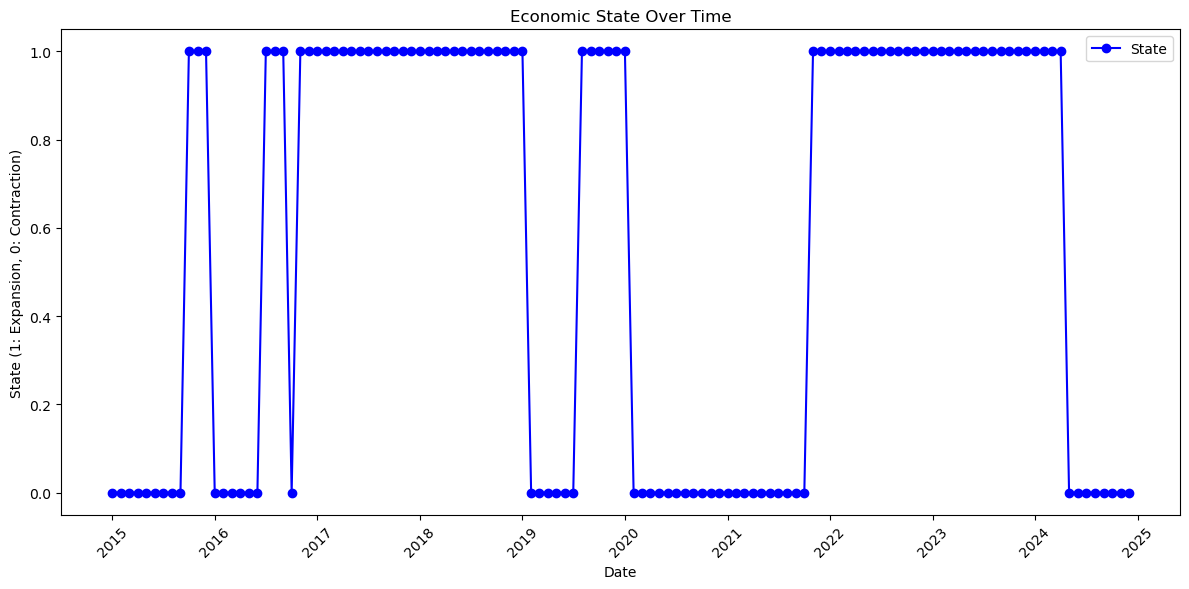

In [22]:
# state 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['state'], marker='o', linestyle='-', color='blue', label='State')
plt.title('Economic State Over Time')
plt.xlabel('Date')
plt.ylabel('State (1: Expansion, 0: Contraction)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd

In [39]:
kospi = pd.read_csv(r'..\data\코스피 200 과거 데이터.csv', encoding='utf-8')

In [40]:
kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459 entries, 0 to 2458
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      2459 non-null   object 
 1   종가      2459 non-null   float64
 2   시가      2459 non-null   float64
 3   고가      2459 non-null   float64
 4   저가      2459 non-null   float64
 5   거래량     2459 non-null   object 
 6   변동 %    2459 non-null   object 
dtypes: float64(4), object(3)
memory usage: 134.6+ KB


In [41]:
# 변동 % 컬럼 끝에 %글자 제거 후 float로 변환
kospi['변동 %'] = kospi['변동 %'].str.replace('%', '').astype(float)

In [42]:
kospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2015- 01- 02,244.79,243.96,245.32,243.25,54.15K,0.30
1,2015- 01- 05,244.26,243.83,244.56,241.76,62.85K,-0.22
2,2015- 01- 06,239.93,241.36,242.06,239.32,66.25K,-1.77
3,2015- 01- 07,240.53,239.41,240.91,239.09,54.60K,0.25
4,2015- 01- 08,243.94,242.28,244.13,241.68,64.02K,1.42
...,...,...,...,...,...,...,...
2454,2024- 12- 23,322.98,321.00,324.00,319.77,100.61M,1.46
2455,2024- 12- 24,323.39,324.11,324.50,321.86,78.51M,0.13
2456,2024- 12- 26,321.45,324.48,324.48,321.42,92.61M,-0.60
2457,2024- 12- 27,319.03,320.24,321.30,316.91,86.74M,-0.75


In [43]:
# 날짜 컬럼 문자열을 datetime으로 변환
kospi['날짜'] = pd.to_datetime(kospi['날짜'], format='%Y- %m- %d')

In [44]:
kospi['날짜'].dt.strftime('%Y-%m-%d')

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
2454    2024-12-23
2455    2024-12-24
2456    2024-12-26
2457    2024-12-27
2458    2024-12-30
Name: 날짜, Length: 2459, dtype: object

In [45]:
# 거래량 컬럼 문자열을 정수로 변환 (K: 천, M: 백만)
def parse_volume(x):
	if isinstance(x, str):
		if x.endswith('K'):
			return float(x.replace('K', '')) * 1000
		elif x.endswith('M'):
			return float(x.replace('M', '')) * 1000000
		else:
			return float(x)
	return x

kospi['거래량'] = kospi['거래량'].apply(parse_volume)

In [46]:
kospi

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2015-01-02,244.79,243.96,245.32,243.25,54150.0,0.30
1,2015-01-05,244.26,243.83,244.56,241.76,62850.0,-0.22
2,2015-01-06,239.93,241.36,242.06,239.32,66250.0,-1.77
3,2015-01-07,240.53,239.41,240.91,239.09,54600.0,0.25
4,2015-01-08,243.94,242.28,244.13,241.68,64020.0,1.42
...,...,...,...,...,...,...,...
2454,2024-12-23,322.98,321.00,324.00,319.77,100610000.0,1.46
2455,2024-12-24,323.39,324.11,324.50,321.86,78510000.0,0.13
2456,2024-12-26,321.45,324.48,324.48,321.42,92610000.0,-0.60
2457,2024-12-27,319.03,320.24,321.30,316.91,86740000.0,-0.75


In [47]:
# # ───────────────────── 0. 패키지 설치/임포트 ─────────────────────
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# # ───────────────────── 1. 데이터 준비 ─────────────────────
# # ① 날짜 컬럼 → datetime, 인덱스 지정
# kospi = kospi.set_index("날짜").sort_index()

# # ② 월말 종가로 리샘플 & 로그수익률 생성
# close = kospi["종가"].resample("M").last()
# y = np.log(close).diff().dropna()      # 월별 로그수익률

# # ───────────────────── 2. Markov-Switching(2 국면) 추정 ─────────────────────
# mod = MarkovRegression(
#     endog=y,
#     k_regimes=2,              # 2-state: Expansion vs Contraction
#     trend="c",                # 각 국면별 상수항
#     switching_variance=True   # 분산까지 국면별
# )
# res = mod.fit(method="lbfgs", maxiter=500, disp=False)
# print(res.summary())

# # ───────────────────── 3. 국면(label) 판정 ─────────────────────
# # smoothed probabilities: 국면-1(인덱스 1)의 확률
# prob_state1 = res.smoothed_marginal_probabilities[1]

# # 평균이 더 큰 국면을 ⇒ Expansion 로 명명
# regime_means = res.params[:2]          # 각 국면 상수항
# expansion_regime = regime_means.argmax()
# labels = (prob_state1 > 0.5).astype(int)            # 0/1
# labels = labels.replace(
#             {expansion_regime: "Expansion",
#              1-expansion_regime: "Contraction"}
#          )

# # ───────────────────── 4. 시각화 ─────────────────────
# fig, ax = plt.subplots(figsize=(11,4))
# # ① 코스피 레벨선
# ax.plot(close.index, close, color="black", label="KOSPI (월말 종가)")
# ax.set_yscale("log")

# # ② 국면 색칠
# for phase, color in [("Expansion","tab:red"), ("Contraction","tab:blue")]:
#     mask = labels == phase
#     if mask.any():
#         ax.fill_between(
#             close.index, close.min()*0.9, close.max()*1.1,
#             where=mask.reindex(close.index, fill_value=False),
#             color=color, alpha=0.15, label=phase
#         )

# ax.set_title("KOSPI Regimes by 2-state Markov-Switching", fontsize=13)
# ax.legend()
# plt.tight_layout()
# plt.show()

# # ───────────────────── 5. 결과 요약 테이블 (수정) ─────────────────────
# # y(수익률)·labels(국면) 하나로 모으기
# df = pd.DataFrame({"label": labels, "ret": y})

# # ① 국면이 달라질 때마다 새 group ID 부여
# df["gid"] = (df["label"] != df["label"].shift()).cumsum()

# # ② 각 연속 구간별 요약
# summary = (
#     df.groupby("gid")
#       .agg(Start   = ("label", lambda s: s.index[0]),
#            End     = ("label", lambda s: s.index[-1]),
#            Regime  = ("label", "first"),
#            Duration_months = ("label", "size"),
#            Mean_return_pct = ("ret",  lambda r: r.mean()*100))
#       .reset_index(drop=True)
# )

# print("\n◼︎ Regime summary ({}–{})".format(df.index[0].date(), df.index[-1].date()))
# display(summary)

C:\Users\user\AppData\Local\Temp\ipykernel_23252\1526818666.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  close = kospi["종가"].resample("M").last()
C:\Users\user\AppData\Local\Temp\ipykernel_23252\1526818666.py:59: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_23252\1526818666.py:59: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_23252\1526818666.py:59: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_23252\1526818666.py:59: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\anaconda3\envs\base_clone\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarn

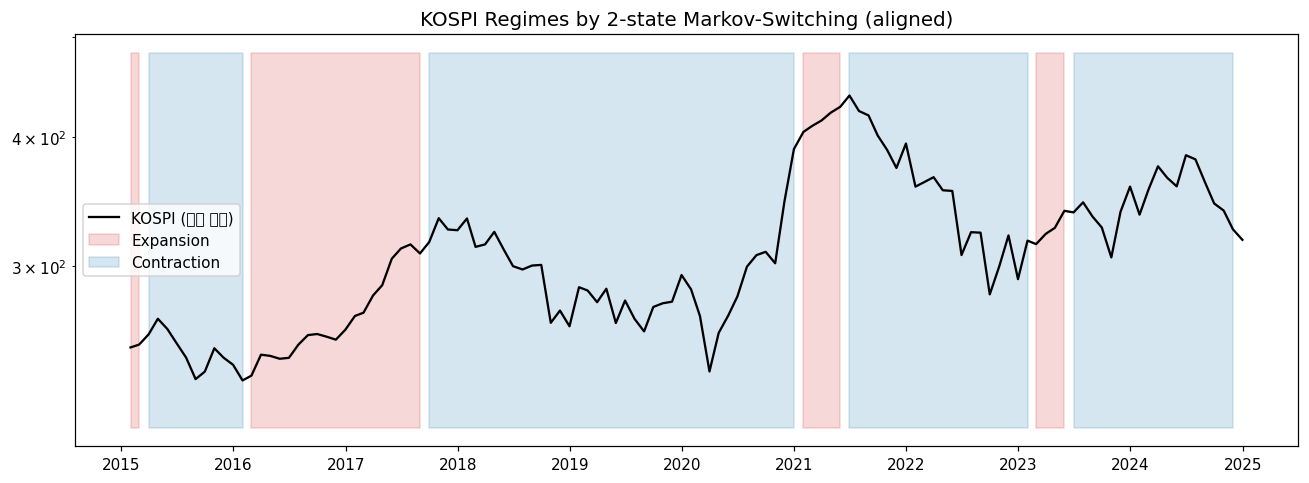


◼︎ Regime summary (2015-01-01 – 2024-11-30)


,End,Regime,Duration_months,Mean_return_pct,Start
0,2015-02-28,Expansion,2,1.459209,2015-01-01
1,2016-01-31,Contraction,11,-0.837774,2015-03-01
2,2017-08-31,Expansion,19,1.571508,2016-02-01
3,2020-12-31,Contraction,40,0.615509,2017-09-01
4,2021-05-31,Expansion,5,1.626697,2021-01-01
5,2023-01-31,Contraction,20,-1.660987,2021-06-01
6,2023-05-31,Expansion,4,1.774011,2023-02-01
7,2024-11-30,Contraction,18,-0.341182,2023-06-01


In [48]:
# ───────────────────── 0. 라이브러리 ─────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

plt.rcParams["figure.dpi"] = 110   # 노트북 해상도 개선

# ───────────────────── 1. 데이터 준비 ─────────────────────
# (가정) kospi DataFrame이 이미 메모리에 있음: ['날짜','종가', …]
kospi = kospi.set_index("날짜").sort_index()

# ① 월말 종가
close = kospi["종가"].resample("M").last()

# ② 로그수익률을 *앞달*로 귀속 → 인덱스 공백 없음
ret = np.log(close).diff().shift(-1).dropna()

# ───────────────────── 2. Markov-Switching(2 Regimes) 추정 ─────────────────────
mod = MarkovRegression(
    endog=ret,
    k_regimes=2,              # 확장·수축
    trend="c",                # 각 국면별 상수항
    switching_variance=True   # 분산도 국면별
)
res = mod.fit(method="lbfgs", maxiter=500, disp=False)

# ───────────────────── 3. 국면(label) 판정 ─────────────────────
prob_state1 = res.smoothed_marginal_probabilities[1]
regime_means = res.params[:2]          # 국면별 평균
expansion_regime = regime_means.argmax()

labels = (prob_state1 > 0.5).astype(int).replace({
    expansion_regime: "Expansion",
    1 - expansion_regime: "Contraction"
})

# ───────────────────── 4. 시각화 ─────────────────────
fig, ax = plt.subplots(figsize=(12, 4.5))

# ① KOSPI 레벨선 (log 스케일)
ax.plot(close.index, close, color="black", label="KOSPI (월말 종가)")
ax.set_yscale("log")

# ② 국면 영역 색칠
colors = {"Expansion": "tab:red", "Contraction": "tab:blue"}
for phase, color in colors.items():
    mask = labels == phase
    if mask.any():
        ax.fill_between(
            close.index,
            close.min() * 0.9, close.max() * 1.1,
            where=mask.reindex(close.index, fill_value=False),
            color=color, alpha=0.18, label=phase
        )

ax.set_title("KOSPI Regimes by 2-state Markov-Switching (aligned)", fontsize=13)
ax.legend()
plt.tight_layout()
plt.show()

# ───────────────────── 5. Regime summary (월-시작 날짜로 표시) ─────────────────────
df = pd.DataFrame({"label": labels, "ret": ret})
df["gid"] = (df["label"] != df["label"].shift()).cumsum()   # 연속 구간 ID

def month_start(ts):
    """월말 Timestamp → 같은 달 1일 Timestamp"""
    return ts.replace(day=1)

summary = (
    df.groupby("gid")
      .agg(
          Start_raw = ("label", lambda s: s.index[0]),      # 구간 첫 월말
          End       = ("label", lambda s: s.index[-1]),     # 구간 마지막 월말
          Regime    = ("label", "first"),
          Duration_months = ("label", "size"),
          Mean_return_pct = ("ret",  lambda r: r.mean()*100)
      )
      .assign(Start=lambda x: x["Start_raw"].apply(month_start))  # ① 월-시작 변환
      .drop(columns="Start_raw")
      .reset_index(drop=True)
)

print(f"\n◼︎ Regime summary ({summary.Start.min().date()} – {summary.End.max().date()})")
display(summary)


In [49]:
summary

,End,Regime,Duration_months,Mean_return_pct,Start
0,2015-02-28,Expansion,2,1.459209,2015-01-01
1,2016-01-31,Contraction,11,-0.837774,2015-03-01
2,2017-08-31,Expansion,19,1.571508,2016-02-01
3,2020-12-31,Contraction,40,0.615509,2017-09-01
4,2021-05-31,Expansion,5,1.626697,2021-01-01
5,2023-01-31,Contraction,20,-1.660987,2021-06-01
6,2023-05-31,Expansion,4,1.774011,2023-02-01
7,2024-11-30,Contraction,18,-0.341182,2023-06-01


In [50]:
# ───────────────────── 6. 일간 국면 라벨 DataFrame ─────────────────────
# 1) 원하는 일간 인덱스 생성
daily_idx = pd.date_range("2015-01-01", "2024-12-31", freq="D")

# 2) 월말 라벨 → 일간으로 보간
#    • .reindex → 일간 인덱스에 맞추고
#    • .ffill()  → 가장 가까운 과거 월말 값을 앞으로 채움
#    • .bfill()  → 맨 앞(2015-01-01) 공백을 첫 국면으로 채움
regime_daily = (
    labels
      .reindex(daily_idx)   # 월말 → 일간 스켈레톤
      .ffill()              # 과거 값 앞으로 채우기
      .bfill()              # 맨 앞 공백 보완
      .to_frame(name="Regime")   # Series → DataFrame
)

# 3) (선택) 숫자 코드 추가: Expansion = 1, Contraction = 0
regime_daily["Regime_code"] = regime_daily["Regime"].map({"Expansion":1, "Contraction":0})

In [51]:
regime_daily

,Regime,Regime_code
2015-01-01,Expansion,1
2015-01-02,Expansion,1
2015-01-03,Expansion,1
2015-01-04,Expansion,1
2015-01-05,Expansion,1
...,...,...
2024-12-27,Contraction,0
2024-12-28,Contraction,0
2024-12-29,Contraction,0
2024-12-30,Contraction,0


In [54]:
# 날짜 인덱스를 'Date' 컬럼으로 변환
regime_daily_reset = (
    regime_daily
      .reset_index()                 # 인덱스 → 일반 컬럼
      .rename(columns={"index": "상장일"})   # 컬럼 이름 변경
      .loc[:, ["상장일", "Regime", "Regime_code"]]   # 열 순서 정리 (선택)
)

print(regime_daily_reset.head())

         상장일     Regime  Regime_code
0 2015-01-01  Expansion            1
1 2015-01-02  Expansion            1
2 2015-01-03  Expansion            1
3 2015-01-04  Expansion            1
4 2015-01-05  Expansion            1


In [59]:
regime_daily_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   상장일          3653 non-null   datetime64[ns]
 1   Regime       3653 non-null   object        
 2   Regime_code  3653 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 85.7+ KB


In [57]:
data = pd.read_csv(r'..\data\giup_data.csv')
data = data[['회사명','상장일']]

In [61]:
# 상장일 컬럼을 datetime 형식으로 변환
data['상장일'] = pd.to_datetime(data['상장일'], format='%Y-%m-%d')

In [63]:
markov_switching = pd.merge(data, regime_daily_reset, on='상장일', how='left')

In [65]:
markov_switching.drop(columns=['Regime'], inplace=True)

In [ ]:
markov_switching.to_csv(r'..\data\경기국면\markov_switching.csv', index=False, encoding='utf-8-sig')